In [141]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# Some helpful utils
def collapse_duplicate_tasks(df, success_column):
    idx = df.groupby('task_id')[success_column].idxmax()
    collapsed_df = df.loc[idx]
    collapsed_df = collapsed_df.reset_index(drop=True)
    return collapsed_df

def bootstrap_column(df, column_child, column_base):
    df[column_child] = df[column_child].fillna(df[column_base])
    df[column_child] = np.maximum(df[column_child], df[column_base])
    return df

In [143]:
srcdir_sota1 = "../data/results_step_sota1"
df_gpt4_sota1 = pd.read_csv(f"{srcdir_sota1}/summary_gpt4_benchmarking_paper.csv")

df_gpt4_sota1.rename(columns={'gpt4_flat_success': 'gpt4_sota1_success'}, inplace=True)
df_gpt4_sota1 = collapse_duplicate_tasks(df_gpt4_sota1, 'gpt4_sota1_success')

df_gpt4_sota1.head(3)

,files,task_id,sites,intent_template,intent_template_id,intent,gpt_4_flat_intent,eval_reference_answers,eval_eval_types,gpt4_sota1_success
0,0.json,0,['shopping_admin'],What is the top-{{n}} best-selling product in ...,279,What is the top-1 best-selling product in 2022,What is the top-1 best-selling product in 2022,{'exact_match': 'Quest Lumaflex™ Band'},['string_match'],1
1,1.json,1,['shopping_admin'],What is the top-{{n}} best-selling brand in {{...,279,What is the top-1 best-selling brand in Quarte...,What is the top-1 best-selling brand in Quarte...,{'exact_match': 'Sprite'},['string_match'],0
2,2.json,2,['shopping_admin'],What is the top-{{n}} best-selling product typ...,279,What is the top-1 best-selling product type in...,What is the top-1 best-selling product type in...,{'exact_match': 'Yoga ball'},['string_match'],0


In [144]:
srcdir_sota2 = "../data/results_step_sota2"
df_gpt4_sota2 = pd.read_csv(f"{srcdir_sota2}/summary.csv")

df_gpt4_sota2.rename(columns={'Result': 'gpt4_sota2_success'}, inplace=True)
# df_gpt4_sota2['task_id'] = df_gpt4_sota1.apply(lambda x: int(x['Config'].replace('.json', '')), axis=1)
df_gpt4_sota2['task_id'] = df_gpt4_sota2['Config'].str.extract(r'(\d+)').astype(int)
df_gpt4_sota2.drop(columns=['Config'], inplace=True)

df_gpt4_sota2 = collapse_duplicate_tasks(df_gpt4_sota2, 'gpt4_sota2_success')
df_gpt4_sota2 = pd.merge(df_gpt4_sota2, df_gpt4_sota1[["task_id", "sites"]], left_on="task_id", right_on="task_id", how="inner")

df_gpt4_sota2.head(3)

,Intent,gpt4_sota2_success,task_id,sites
0,What is the top-1 best-selling product in 2022,0,0,['shopping_admin']
1,What is the top-1 best-selling brand in Quarte...,0,1,['shopping_admin']
2,What is the top-1 best-selling product type in...,0,2,['shopping_admin']


In [145]:
## Load gpt4_step success rates
srcdir_step = "../data/results_step/webarena"
logdirs_step = ["20240205-185838", "20240217-232912", "20240303-191438", "20240317-215516", "20240317-195557","20240324-091310","20240324-101913"]

dfs = []
for logdir in logdirs_step:
    df = pd.read_csv(f"{srcdir_step}/{logdir}/summary.csv")
    dfs.append(df)
    
df_step = pd.concat(dfs, axis=0)
df_step.reset_index(drop=True, inplace=True)
df_step.rename(columns={'success': 'gpt4_step_success'}, inplace=True)
df_step.rename(columns={'num_actions': 'gpt4_step_num_actions'}, inplace=True)

df_step = collapse_duplicate_tasks(df_step, 'gpt4_step_success')


print(df_step.head(3))

                     task  task_id                model  \
0  tasks/webarena/21.json       21  gpt-4-turbo-preview   
1  tasks/webarena/22.json       22  gpt-4-turbo-preview   
2  tasks/webarena/23.json       23  gpt-4-turbo-preview   

                   logfile  done  reward  gpt4_step_success  \
0  20240317-215516/21.json  True     0.0                0.0   
1  20240317-215516/22.json  True     1.0                1.0   
2  20240317-215516/23.json  True     1.0                1.0   

   gpt4_step_num_actions type  
0                      2  NaN  
1                      6  NaN  
2                      8  NaN  


In [146]:
## Load gpt4_step success rates
srcdir_step = "../data/results_flat8k/webarena"
logdirs_step = ["20240320-231444", "20240323-194242","20240324-122240"]

dfs = []
for logdir in logdirs_step:
    df = pd.read_csv(f"{srcdir_step}/{logdir}/summary.csv")
    dfs.append(df)
    
df_flat8k = pd.concat(dfs, axis=0)
df_flat8k.reset_index(drop=True, inplace=True)
df_flat8k.rename(columns={'success': 'gpt4_flat8k_success'}, inplace=True)
df_flat8k.rename(columns={'num_actions': 'gpt4_flat8k_num_actions'}, inplace=True)

df_flat8k = collapse_duplicate_tasks(df_flat8k, 'gpt4_flat8k_success')

print(df_flat8k.head(3))

                     task  task_id                model             tag  \
0  tasks/webarena/21.json       21  gpt-4-turbo-preview  flat_fewshot8k   
1  tasks/webarena/22.json       22  gpt-4-turbo-preview  flat_fewshot8k   
2  tasks/webarena/23.json       23  gpt-4-turbo-preview  flat_fewshot8k   

                   logfile  done  reward  gpt4_flat8k_success  \
0  20240320-231444/21.json  True     0.0                  0.0   
1  20240320-231444/22.json  True     1.0                  1.0   
2  20240320-231444/23.json  True     0.0                  0.0   

   gpt4_flat8k_num_actions type  
0                        2  NaN  
1                        3  NaN  
2                        2  NaN  


In [147]:
## Load gpt4_step success rates

srcdir_step = "../data/results_flat4k/webarena"
logdirs_step = ["20240323-082758","20240323-172927","20240324-153146"]

dfs = []
for logdir in logdirs_step:
    df = pd.read_csv(f"{srcdir_step}/{logdir}/summary.csv")
    dfs.append(df)
    
df_flat4k = pd.concat(dfs, axis=0)
df_flat4k.reset_index(drop=True, inplace=True)
df_flat4k.rename(columns={'success': 'gpt4_flat4k_success'}, inplace=True)
df_flat4k.rename(columns={'num_actions': 'gpt4_flat4k_num_actions'}, inplace=True)

df_flat4k = collapse_duplicate_tasks(df_flat4k, 'gpt4_flat4k_success')

print(df_flat4k.head(3))

                     task  task_id                model            type  \
0  tasks/webarena/21.json       21  gpt-4-turbo-preview  flat_fewshot4k   
1  tasks/webarena/22.json       22  gpt-4-turbo-preview  flat_fewshot4k   
2  tasks/webarena/23.json       23  gpt-4-turbo-preview  flat_fewshot4k   

                   logfile  done  reward  gpt4_flat4k_success  \
0  20240323-082758/21.json  True     0.0                  0.0   
1  20240323-082758/22.json  True     0.0                  0.0   
2  20240323-082758/23.json  True     0.0                  0.0   

   gpt4_flat4k_num_actions  
0                        2  
1                        2  
2                        2  


In [148]:
## Merge dataframes
df = pd.merge(df_step, df_gpt4_sota1, on='task_id', how='outer')
df = pd.merge(df, df_flat8k[['task_id', 'gpt4_flat8k_success', 'gpt4_flat8k_num_actions']], on='task_id', how='outer')
df = pd.merge(df, df_flat4k[['task_id', 'gpt4_flat4k_success', 'gpt4_flat4k_num_actions']], on='task_id', how='outer')
df = pd.merge(df, df_gpt4_sota2[['task_id', 'gpt4_sota2_success']], on='task_id', how='outer')

bootstrap_column(df, 'gpt4_flat4k_success', 'gpt4_sota1_success')
bootstrap_column(df, 'gpt4_flat8k_success', 'gpt4_sota1_success')
bootstrap_column(df, 'gpt4_step_success', 'gpt4_sota1_success')

print(df.head(3))

                     task  task_id                model  \
0  tasks/webarena/21.json       21  gpt-4-turbo-preview   
1  tasks/webarena/22.json       22  gpt-4-turbo-preview   
2  tasks/webarena/23.json       23  gpt-4-turbo-preview   

                   logfile  done  reward  gpt4_step_success  \
0  20240317-215516/21.json  True     0.0                0.0   
1  20240317-215516/22.json  True     1.0                1.0   
2  20240317-215516/23.json  True     1.0                1.0   

   gpt4_step_num_actions type    files  ...  \
0                    2.0  NaN  21.json  ...   
1                    6.0  NaN  22.json  ...   
2                    8.0  NaN  23.json  ...   

                                              intent  \
0  List out reviewers, if exist, who mention abou...   
1  List out reviewers, if exist, who mention abou...   
2  List out reviewers, if exist, who mention abou...   

                                   gpt_4_flat_intent  \
0  List out reviewers, if exist, who men

In [149]:
# Group by the 'sites' column and calculate the mean, standard deviation, and count for the specified columns, and convert means to percentages
group_stats = df.groupby('sites')[['gpt4_sota1_success', 'gpt4_sota2_success',  'gpt4_flat4k_success', 'gpt4_flat8k_success','gpt4_step_success']].agg(['mean', 'std', 'count'])

# Calculate overall means, standard deviations, and count for the entire dataset, and convert means to percentages
overall_stats = df[['gpt4_sota1_success', 'gpt4_sota2_success', 'gpt4_flat4k_success', 'gpt4_flat8k_success', 'gpt4_step_success']].agg(['mean', 'std', 'count'])

print("Group-wise Means, Standard Deviations, and Counts (means as percentages):")
print(group_stats)
print("\nOverall Means, Standard Deviations, and Counts (means as percentages):")
print(overall_stats)

Group-wise Means, Standard Deviations, and Counts (means as percentages):
                          gpt4_sota1_success                  \
                                        mean       std count   
sites                                                          
['gitlab', 'reddit']                0.000000  0.000000    10   
['gitlab', 'wikipedia']             0.000000  0.000000     6   
['gitlab']                          0.141243  0.349260   177   
['map', 'shopping_admin']           0.000000  0.000000     2   
['map', 'wikipedia']                1.000000       NaN     1   
['map']                             0.146789  0.355530   109   
['reddit', 'gitlab']                0.000000  0.000000     8   
['reddit']                          0.113208  0.318352   106   
['shopping', 'reddit']              0.000000  0.000000     5   
['shopping']                        0.197802  0.399441   182   
['shopping_admin']                  0.104396  0.306617   182   
['wikipedia', 'map']          

In [150]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('intent_template_id')
grouped_avg = df.groupby('intent_template_id')[numeric_cols].mean().reset_index()
non_numeric_cols = ['intent_template_id', 'sites', 'intent_template']  # Include any other non-numeric columns you need to keep
grouped_non_numeric = df[non_numeric_cols].drop_duplicates(subset=['intent_template_id']).reset_index(drop=True)
grouped_df = pd.merge(grouped_avg, grouped_non_numeric, on='intent_template_id')


site_categories = ["['shopping']", "['shopping_admin']", "['reddit']", "['gitlab']","['map']"]
final_columns_list = ['sites', 'intent_template_id', 'intent_template','gpt4_sota2_success', 'gpt4_sota1_success', 'gpt4_flat4k_success','gpt4_flat4k_num_actions',
                   'gpt4_flat8k_success', 'gpt4_flat8k_num_actions', 'gpt4_step_success',  'gpt4_step_num_actions', 'success_difference']

group_stats = df.groupby('sites')[['gpt4_sota1_success', 'gpt4_sota2_success',  'gpt4_flat4k_success', 'gpt4_flat8k_success', 'gpt4_step_success', 'gpt4_flat4k_num_actions','gpt4_flat8k_num_actions', 'gpt4_step_num_actions']].agg('mean')

for site in site_categories:
    site_subset = grouped_df[grouped_df['sites'] == site]
    max_sota_success = site_subset[['gpt4_sota1_success', 'gpt4_sota2_success', 'gpt4_flat4k_success', 'gpt4_flat8k_success']].max(axis=1)

    site_subset['success_difference'] = site_subset['gpt4_step_success'] - max_sota_success
    
    site_subset_sorted = site_subset.sort_values(by=['success_difference', 'gpt4_sota1_success', 'gpt4_flat8k_success'], 
                                                 ascending=[False, True, True])
    site_subset_sorted = site_subset_sorted[final_columns_list].reset_index(drop=True)


    # Assign quantiles based on rank
    site_subset_sorted['quantile'], unique = pd.factorize(site_subset_sorted['success_difference'])

    site_stats = group_stats.loc[site]
    site_stats_df = pd.DataFrame([site_stats.values], columns=site_stats.index)
    # Add the missing columns with NaN values
    missing_columns = [col for col in site_subset_sorted.columns if col not in site_stats_df.columns]
    for col in missing_columns:
        site_stats_df[col] = np.nan
    site_stats_df = site_stats_df[site_subset_sorted.columns]
    
    site_subset_sorted = pd.concat([site_subset_sorted, site_stats_df], ignore_index=True)
    
    site_clean = site.replace('[', '').replace(']', '').replace("'", "")
    filename = f"~/Downloads/step_results/{site_clean}_averaged_subset.csv"
    site_subset_sorted.to_csv(filename, index=False)
    print(f"Exported sorted subset for {site} to {filename}")

Exported sorted subset for ['shopping'] to ~/Downloads/step_results/shopping_averaged_subset.csv
Exported sorted subset for ['shopping_admin'] to ~/Downloads/step_results/shopping_admin_averaged_subset.csv
Exported sorted subset for ['reddit'] to ~/Downloads/step_results/reddit_averaged_subset.csv
Exported sorted subset for ['gitlab'] to ~/Downloads/step_results/gitlab_averaged_subset.csv
Exported sorted subset for ['map'] to ~/Downloads/step_results/map_averaged_subset.csv


/var/folders/l3/_8vwt6c52vd4n33jb93sz2yw0000gn/T/ipykernel_23819/2571788494.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_subset['success_difference'] = site_subset['gpt4_step_success'] - max_sota_success
/var/folders/l3/_8vwt6c52vd4n33jb93sz2yw0000gn/T/ipykernel_23819/2571788494.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_subset['success_difference'] = site_subset['gpt4_step_success'] - max_sota_success
/var/folders/l3/_8vwt6c52vd4n33jb93sz2yw0000gn/T/ipykernel_23819/2571788494.py

In [151]:
site_subset_sorted

,sites,intent_template_id,intent_template,gpt4_sota2_success,gpt4_sota1_success,gpt4_flat4k_success,gpt4_flat4k_num_actions,gpt4_flat8k_success,gpt4_flat8k_num_actions,gpt4_step_success,gpt4_step_num_actions,success_difference,rank,quantile
0,['map'],39.0,Where is the nearest {{location}} from {{locat...,0.000000,0.000000,0.000000,18.000000,0.000000,20.000000,1.000000,6.000000,1.00,1.0,0.0
1,['map'],69.0,Tell me the closest {{place1}}(s) to {{place2}},0.000000,0.000000,0.000000,17.000000,0.200000,16.800000,1.000000,4.000000,0.80,2.0,0.0
2,['map'],51.0,What is the estimated driving time between {{c...,0.000000,0.000000,0.750000,4.750000,0.750000,4.500000,1.000000,5.000000,0.25,3.0,0.0
3,['map'],64.0,"From my stay at {{hotel}}, what's the estimate...",0.200000,0.400000,0.400000,5.000000,0.400000,5.000000,0.600000,4.400000,0.20,4.0,0.0
4,['map'],35.0,"I am at CMU Pittsburgh, how long it takes to t...",0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.00,5.0,0.0
5,['map'],41.0,Show me the walking distance from nearby hotel...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.00,6.0,0.0
6,['map'],49.0,Show the route from SCS CMU in Pittsburgh to t...,0.000000,0.000000,0.000000,5.000000,0.000000,12.000000,0.000000,6.000000,0.00,7.0,1.0
7,['map'],54.0,Get directions from {{location/address_1}} to ...,0.000000,0.000000,0.000000,5.000000,0.000000,10.500000,0.000000,14.000000,0.00,8.0,1.0
8,['map'],65.0,"Given the following locations, {{place_list}},...",0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.00,9.0,1.0
9,['map'],66.0,"Where is the nearest {{places}} to {{start}}, ...",0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.00,10.0,1.0


<Figure size 1000x800 with 0 Axes>

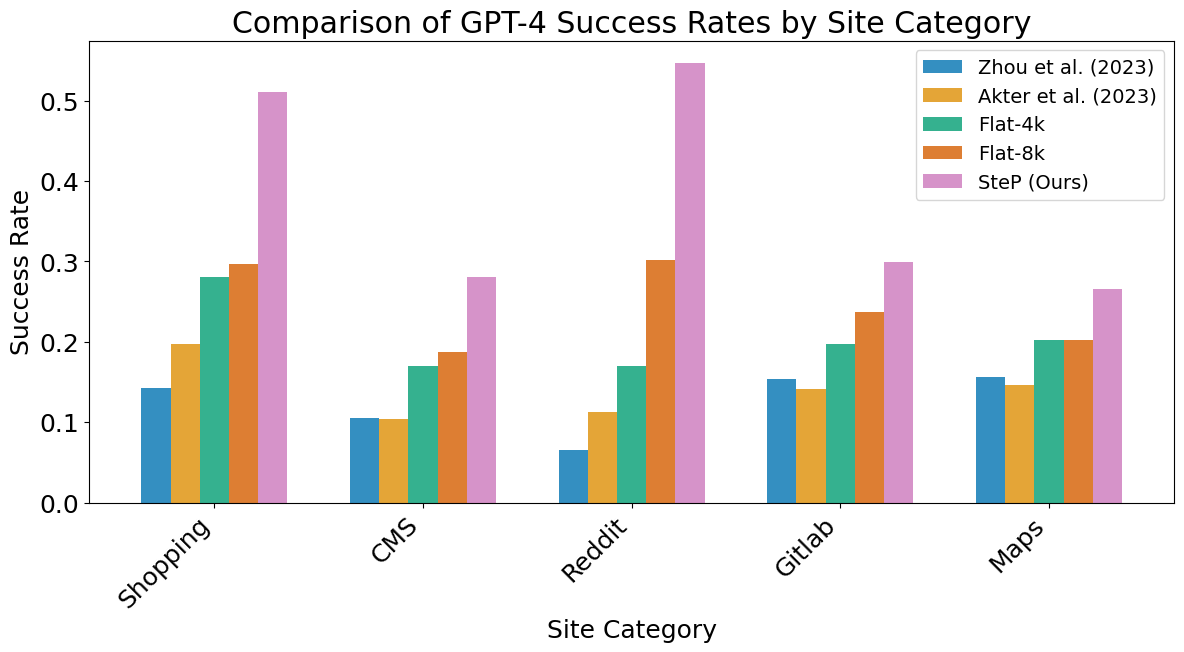

In [152]:
group_stats = df.groupby('sites')[['gpt4_sota1_success', 'gpt4_sota2_success',  'gpt4_flat4k_success', 'gpt4_flat8k_success', 'gpt4_step_success', 'gpt4_flat4k_num_actions','gpt4_flat8k_num_actions', 'gpt4_step_num_actions']].agg('mean')
site_categories = ["['shopping']", "['shopping_admin']", "['reddit']", "['gitlab']","['map']"]

filtered_stats = group_stats.loc[site_categories]

# Plot
plt.figure(figsize=(10, 8))
plt.rc('font', size=18) 

# We will plot the selected columns for comparison.
columns_to_compare = ['gpt4_sota2_success', 'gpt4_sota1_success', 'gpt4_flat4k_success', 'gpt4_flat8k_success', 'gpt4_step_success']

# Aesthetic settings
colors = sns.color_palette('colorblind', len(columns_to_compare)) # deep, colorblind, tab10, pastel
filtered_stats[columns_to_compare].plot(kind='bar', width=0.7, figsize=(14, 6), color=colors, alpha=0.8)

plt.title('Comparison of GPT-4 Success Rates by Site Category')
plt.ylabel('Success Rate')
plt.xlabel('Site Category')
plt.xticks(ticks=range(len(site_categories)), labels=['Shopping', 'CMS', 'Reddit', 'Gitlab', 'Maps'], rotation=45, ha="right")
plt.legend(['Zhou et al. (2023)', 'Akter et al. (2023)', 'Flat-4k', 'Flat-8k', 'SteP (Ours)'], title='', fontsize=14)


# Show plot
# plt.tight_layout()
plt.show()


In [153]:
group_stats

,gpt4_sota1_success,gpt4_sota2_success,gpt4_flat4k_success,gpt4_flat8k_success,gpt4_step_success,gpt4_flat4k_num_actions,gpt4_flat8k_num_actions,gpt4_step_num_actions
sites,,,,,,,,
"['gitlab', 'reddit']",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
"['gitlab', 'wikipedia']",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
['gitlab'],0.141243,0.153409,0.197740,0.237288,0.299435,5.483333,6.651685,8.730337
"['map', 'shopping_admin']",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
"['map', 'wikipedia']",1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
['map'],0.146789,0.155963,0.201835,0.201835,0.266055,6.888889,7.644444,6.844444
"['reddit', 'gitlab']",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
['reddit'],0.113208,0.066038,0.169811,0.301887,0.547170,9.865672,12.089552,10.283582
"['shopping', 'reddit']",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
